In [1]:
import os
import geopandas as gp
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from pylab import *
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

In [3]:
# latlon_1degree_SJ_last=path+'/global_grid.shp'
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
excel_dir=os.path.join(output_dir,f'stastics_excel')

gdb=os.path.join(output_dir,f'7_correct_temp_file.gdb')
fig_path=r'D:\lakemapping\10_paper_writting\figure\v3_250114'
os.makedirs(fig_path,exist_ok=True)
# latlon_1degree_SJ_last_data = gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')

global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve.shp'
Arid_Region=r'D:\lakemapping\0_auxiliary_data\AI\Global-AI_ET0_annual_v3\Global-AI_ET0_v3_annual\Global_AI_Reclassify_Clip_simple.shp'

color_list=['#B8DBB3','#72B063','#E29135','#94C6CD','#719AAC','#4A5F7E','#9e003a']#浅绿，深绿，橙色，浅蓝，中蓝，深蓝,红
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a','b','c','d','e','f']
red_color_list=['#311d3f','#522546','#88304e']
# lake_category_bins=[0.005,0.01,1,100,10000,1000000]
# lake_category_labels=['Tiny','Small','Medium','Large','Super large']

lake_category_bins=[0.005,0.01,1,100,10000,1000000]
lake_category_labels=['1','3','10','100']

In [11]:
latlon_1degree_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')
latlon_1degree_SJ_last_data

,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lat_down,Lon_left,...,diff_c0,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100,geometry
0,0,1,6857.436497,0,0,0,0,0,-57,-69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.00000 -57.00000, -69.00000..."
1,1,2,7035.675627,1,1,0,0,0,-56,-72,...,1.0,0.0,0.0,0.0,0.0,0.008277,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-72.00000 -56.00000, -72.00000..."
2,186,3,7035.675627,184,33,60,55,34,-56,-71,...,170.0,137.0,56.0,53.0,27.0,12.307538,1.039664,2.839164,6.704510,"MULTIPOLYGON (((-71.00000 -56.00000, -71.00000..."
3,436,4,7035.675627,432,98,124,108,95,-56,-70,...,366.0,268.0,120.0,92.0,52.0,50.037233,2.068706,5.377594,13.719308,"MULTIPOLYGON (((-70.00000 -56.00000, -70.00000..."
4,533,5,7035.675627,529,137,188,144,58,-56,-69,...,321.0,184.0,132.0,44.0,9.0,5.547762,2.239651,2.430952,1.974050,"MULTIPOLYGON (((-69.00000 -56.00000, -69.00000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,62,18046,2698.461110,62,21,27,8,5,77,104,...,62.0,41.0,27.0,8.0,5.0,4.210387,0.429799,0.431722,1.202110,"MULTIPOLYGON (((104.00000 77.00000, 104.00000 ..."
18046,47,18047,2698.461110,45,19,13,7,4,77,105,...,41.0,22.0,12.0,6.0,3.0,7.155236,0.200577,0.303044,0.645353,"MULTIPOLYGON (((105.00000 77.00000, 105.00000 ..."
18047,13,18048,2698.461110,13,4,5,3,1,77,106,...,6.0,2.0,-2.0,3.0,1.0,0.401006,-0.027417,0.130375,0.265666,"MULTIPOLYGON (((106.00000 77.00000, 106.00000 ..."
18048,3,18049,2698.461110,3,1,1,1,0,77,107,...,2.0,1.0,1.0,0.0,0.0,0.048315,0.020615,0.021268,0.000000,"MULTIPOLYGON (((107.00000 77.00000, 107.00000 ..."


In [5]:
latlon_1degree_SJ_last_data['hu_c3'].sum()

4054594.0

In [6]:
latlon_1degree_SJ_last_data['hu_c100'].sum()

1406224.0

In [12]:
Lat_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
latitude= Lat_data['Lat_down'].values
Lat_data

,Lat_down,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lon_left,...,hu_ap_small_lake,diff_c0,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100
0,-57,0,1,6857.436497,0,0,0,0,0,-69,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,-56,1735,44,56285.405019,1718,403,543,472,281,-294,...,394.748336,930.0,527.0,277.0,172.0,74.0,67.171115,4.959826,9.629766,20.703206
2,-55,4508,333,129810.117465,4466,1260,1403,1046,687,-783,...,1016.938581,3343.0,2083.0,905.0,712.0,429.0,235.028388,15.927083,39.926521,107.026721
3,-54,4032,325,73853.770185,3996,1019,1238,950,685,-649,...,412.164301,2642.0,1623.0,802.0,545.0,266.0,-1563.896859,14.035021,30.241569,51.591873
4,-53,4034,623,105794.302551,4009,1109,1321,896,605,-485,...,975.839656,2507.0,1398.0,813.0,431.0,149.0,-2096.931058,13.864983,22.765979,35.964117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,73,85557,2329362,470733.379050,84688,25535,27780,17838,12038,1763,...,8156.998172,36464.0,10929.0,7095.0,2260.0,1240.0,1673.288001,115.584038,134.131660,244.062929
131,74,20054,2063763,389690.967955,19750,5427,6096,4415,3413,651,...,7156.948019,9861.0,4434.0,2255.0,1142.0,925.0,717.998134,37.013279,64.534344,244.054391
132,75,17087,2291298,402602.122655,16866,5122,5570,3536,2299,579,...,8677.642232,9571.0,4449.0,2401.0,1263.0,677.0,654.712713,41.097217,71.810755,176.547819
133,76,12821,2289984,372503.081772,12680,4300,4583,2458,1183,-1591,...,8345.407714,9075.0,4775.0,2721.0,1387.0,595.0,579.090750,46.797857,74.579374,150.934635


In [13]:
Lon_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
longitude= Lon_data['Lon_left'].values
Lon_data

,Lon_left,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lat_down,...,hu_ap_small_lake,diff_c0,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100
0,-180,3042,119311,94040.668499,3029,849,1022,723,412,368,...,671.148568,1122.0,273.0,177.0,43.0,48.0,1.781249,2.897366,2.836529,10.488531
1,-179,4971,131345,149142.636343,4930,1201,1735,1159,784,291,...,743.185321,1589.0,388.0,217.0,108.0,57.0,52.054786,3.604935,7.419376,17.898684
2,-178,4922,100821,52731.232543,4875,1266,1770,1219,578,386,...,579.039271,1703.0,437.0,300.0,109.0,22.0,73.804704,4.294393,8.147017,6.481802
3,-177,4942,95757,88239.667358,4914,1154,1736,1314,676,243,...,560.122975,1518.0,364.0,235.0,60.0,66.0,69.602328,3.673264,5.500124,14.177389
4,-176,3393,118219,114769.541901,3369,929,1215,829,372,295,...,574.127436,1187.0,258.0,117.0,83.0,55.0,-199.820662,1.621818,4.352748,12.900719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,175,11080,163937,146303.083010,11010,3095,3882,2539,1385,359,...,872.412717,4567.0,1472.0,1035.0,280.0,142.0,154.805965,16.871621,16.557964,38.016632
356,176,11957,147960,171009.355562,11842,3261,4178,2766,1517,238,...,1046.152745,4731.0,1470.0,1053.0,225.0,168.0,-776.451136,17.425648,15.827517,38.288875
357,177,12313,169639,168137.945499,12233,3455,4308,2818,1522,408,...,1025.690044,5127.0,1672.0,1162.0,354.0,134.0,-284.879230,19.396367,20.646762,25.812625
358,178,8411,201313,172226.131717,8361,2504,3106,1857,820,510,...,1004.784507,3535.0,1031.0,715.0,223.0,81.0,-11.004605,12.112053,13.165233,15.626313


In [50]:
GLAKES_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_GLAKES_Count_Area')
G_Lat_data = GLAKES_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
G_Lon_data = GLAKES_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
G_Lat_data

,Lat_down,Join_Count,TARGET_FID,grid_area,GL_c0,GL_c10,GL_c100,Lon_left,Grid_ID,GL_a0,GL_a10,GL_a100,Shape_Length,Shape_Area,GL_ap
0,-57,0,1,6857.436497,0,0,0,-69,1,0.000000,0.000000,0.000000,4.0,1.0,0
1,-56,316,44,56285.405019,316,187,119,-294,44,112.099805,9.901482,29.643026,32.0,8.0,05.91512152032146E-020.1663290281083692.623970...
2,-55,824,333,129810.117465,809,428,343,-783,333,1037.359588,23.600723,99.009015,72.0,18.0,1.55162988524693E-020.1408630807790920.5427666...
3,-54,1010,325,73853.770185,995,491,430,-649,325,488.879336,27.377035,123.101988,40.0,10.0,0.0350886548561560.3820839122725551.1137977422...
4,-53,800,623,105794.302551,790,453,290,-485,623,499.630754,24.807135,88.030706,56.0,14.0,00.2482508369446131.195055144969472.1994243331...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,73,31138,2329362,470733.379050,30527,17103,12057,1763,2329362,8643.557240,938.894364,3368.486098,532.0,133.0,0.9663220428504560.8529363044413580.7872574586...
131,74,8143,2063763,389690.967955,7920,4531,3078,651,2063763,7039.628752,250.040836,832.162548,468.0,117.0,00.2817431521393750.1845324429799440.029516286...
132,75,6681,2291298,402602.122655,6529,4034,2275,579,2291298,1744.583084,216.652603,616.704393,516.0,129.0,1.11247105398213E-035.64842878879636E-037.3275...
133,76,3693,2289984,372503.081772,3615,2470,1060,-1591,2289984,657.543347,129.009418,265.546243,512.0,128.0,05.64557732498607E-027.91751388258399E-020.214...


In [20]:
PLD_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_PLD_Count_Area')
P_Lat_data = PLD_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
P_Lon_data = PLD_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
P_Lat_data

,Lat_down,grid_area,pld_c0,pld_c3,pld_c10,pld_c100,pld_a0,pld_a3,pld_a10,pld_a100,Grid_ID,Shape_Length,Shape_Area,Lon_left
0,-57,6857.436497,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1,4.0,1.0,-69
1,-56,56285.405019,788,266,300,207,164.351580,4.820656,17.133891,54.618322,44,32.0,8.0,-294
2,-55,129810.117465,1123,498,334,258,1042.847090,8.978828,18.007809,72.114481,333,72.0,18.0,-783
3,-54,73853.770185,1354,436,405,419,2247.412294,7.786622,23.296875,138.010746,325,40.0,10.0,-649
4,-53,105794.302551,1502,508,465,456,2882.520033,9.141319,26.211408,133.748477,623,56.0,14.0,-485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,73,470733.379050,48224,20685,15578,10798,8005.564926,366.948714,845.304025,2992.604816,2329362,532.0,133.0,1763
131,74,389690.967955,9889,3841,3273,2488,6965.396863,69.288065,181.545556,682.804430,2063763,468.0,117.0,651
132,75,402602.122655,7295,3169,2273,1622,1662.569978,56.177467,123.031009,446.805908,2291298,516.0,129.0,579
133,76,372503.081772,3619,1868,1074,592,532.072438,32.951338,57.212802,164.860133,2289984,512.0,128.0,-1591


In [30]:
PLD_SJ_last_data['pld_c3'].sum()+PLD_SJ_last_data['pld_c10'].sum()

4489413

In [31]:
PLD_SJ_last_data['pld_c0'].sum()-4489413

1404970

In [15]:
def add_background_fig(ax,ax_legend,data,terrain_map,column,legend_kwds,norm,grid_flag=True):
    map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax)
    map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.4)
    
    tu=data.plot(
            ax=ax,
            cax=ax_legend,
            zorder=1,
            legend=True,  # 图例
            column=column,  # 分级设色字段#picover0\pia_0
            cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
            legend_kwds=legend_kwds,
            norm=norm
            )
    
def draw_line(ax,xlim,xticks,ylim,yticks,line_color,label,x,y):
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.plot(x, y, color=line_color, linestyle = "-",linewidth = 0.8,label=label)
    
def custom_ticks(x, pos):
        if x == 0:
            return "0"
        poww=int(math.log10(x))
        return f"10$^{poww}$"

NameError: name 'P_Lon_data' is not defined

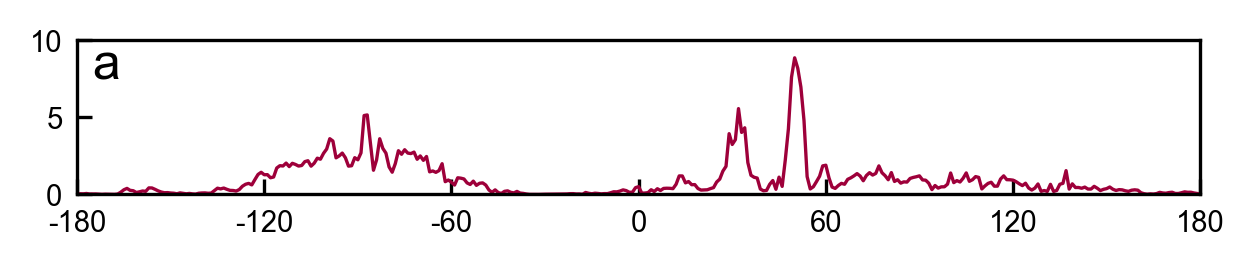

In [16]:
savepic=os.path.join(fig_path,'3-3 compare with PLD.png')
fig=plt.figure(figsize=(6.5,6.25),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(4,3,width_ratios=[0.12,6,0.8],height_ratios=[0.8,2.5,2.5,0.8],wspace =0.25,hspace =0.18)

columns=['diff_a0','diff_c0']
grid_labels=[[0,0,1,0],[0,0,0,1]]
titles=['Difference of lake area (km$^2$)','Difference of lake count']

RdYlBu_r = plt.colormaps.get_cmap('RdBu_r')#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
terrain_map = ListedColormap(newcolors)
    
b1=300
b2=1200
norms=[colors.Normalize(vmin=-b1, vmax=b1),colors.Normalize(vmin=-b2, vmax=b2)]
ticks=[np.arange(-b1,b1+1,100),np.arange(-b2,b2+1,400)]

## 面积、数量纬度分布图
### a.经度面积
ax1=plt.subplot(gs[0, 1],)
ax1.text(-175,7.5,sub_fig_name[0],fontsize=12)
hu_color_id=-1
pld_color_id=-2
s=4
y=Lon_data['hu_a0'].values/(10.0**s)
draw_line(ax1,[-180,180],range(-180,181,60),[0,10],range(0,11,5),color_list[hu_color_id],'GLAKES+',longitude,y)
y=P_Lon_data['pld_a0'].values/(10.0**s)
draw_line(ax1,[-180,180],range(-180,181,60),[0,10],range(0,11,5),color_list[pld_color_id],'PLD',longitude,y)
ax1.text(-180,10,f'×10$^{s}$',ha='left',va='bottom')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Area ($\mathregular{km^2}$)')
ax1.legend(loc=[1.02,0.1],frameon=False)

### b.格网面积
ax22 = plt.subplot(gs[1, 0])
ax2=plt.subplot(gs[1, 1])
ax2.text(-175,75,sub_fig_name[1],fontsize=12)
for spine in ax2.spines.values():
        spine.set_visible(False)
legend_kwds={'orientation': "vertical",'extend':'both','ticks': ticks[0]}
add_background_fig(ax2,ax22,latlon_1degree_SJ_last_data,terrain_map,columns[0],legend_kwds,norms[0])
ax22.text(-1,0, titles[0],rotation=90,ha='right',va='center')

### c.纬度面积
ax3=plt.subplot(gs[1,2])
ax3.text(2,77,sub_fig_name[2],fontsize=12)

s=4
x=Lat_data['hu_a0'].values/(10.0**s)
draw_line(ax3,[0,15],range(0,16,5),[-60,90],range(-60,91,30),color_list[hu_color_id],'GLAKES+',x,latitude)
x=P_Lat_data['pld_a0'].values/(10.0**s)
draw_line(ax3,[0,15],range(0,16,5),[-60,90],range(-60,91,30),color_list[pld_color_id],'PLD',x,latitude)

ax3.text(15.5,-60,f'×10$^{s}$',ha='left',va='bottom')
ax3.set_ylabel('Latitude')
ax3.yaxis.set_label_position("right")

### d.格网数量
ax44 = plt.subplot(gs[2, 0])
ax4=plt.subplot(gs[2, 1])
ax4.text(-175,75,sub_fig_name[3],fontsize=12)
for spine in ax4.spines.values():
        spine.set_visible(False)
legend_kwds={'orientation': "vertical",'extend':'both','ticks': ticks[1]}
add_background_fig(ax4,ax44,latlon_1degree_SJ_last_data,terrain_map,columns[1],legend_kwds,norms[1])
ax44.text(-1,0, titles[1],rotation=90,ha='right',va='center')

### e.纬度数量
ax5=plt.subplot(gs[2,2])
ax5.text(0.75,77,sub_fig_name[4],fontsize=12)

s=5
x=Lat_data['hu_c0'].values/(10.0**s)
draw_line(ax5,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[hu_color_id],'GLAKES+',x,latitude)

x=P_Lat_data['pld_c0'].values/(10.0**s)
draw_line(ax5,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[pld_color_id],'PLD',x,latitude)
ax5.text(6.2,-60,f'×10$^{s}$',ha='left',va='bottom')
ax5.set_ylabel('Latitude')
ax5.yaxis.set_label_position("right")

### f.经度数量
ax6=plt.subplot(gs[3, 1],)
ax6.text(-175,1.4,sub_fig_name[5],fontsize=12)
c_id=2
s=5
y=Lon_data['hu_c0'].values/(10.0**s)
draw_line(ax6,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[hu_color_id],'GLAKES+',longitude,y)
y=P_Lon_data['pld_c0'].values/(10.0**s)
draw_line(ax6,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[pld_color_id],'PLD',longitude,y)
ax6.text(-180,2,f'×10$^{s}$',ha='left',va='bottom')
ax6.set_xlabel('Longitude')
# ax6.xaxis.set_label_position("top")
ax6.set_ylabel('Count')
ax6.legend(loc=[1.02,0.1],frameon=False)
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

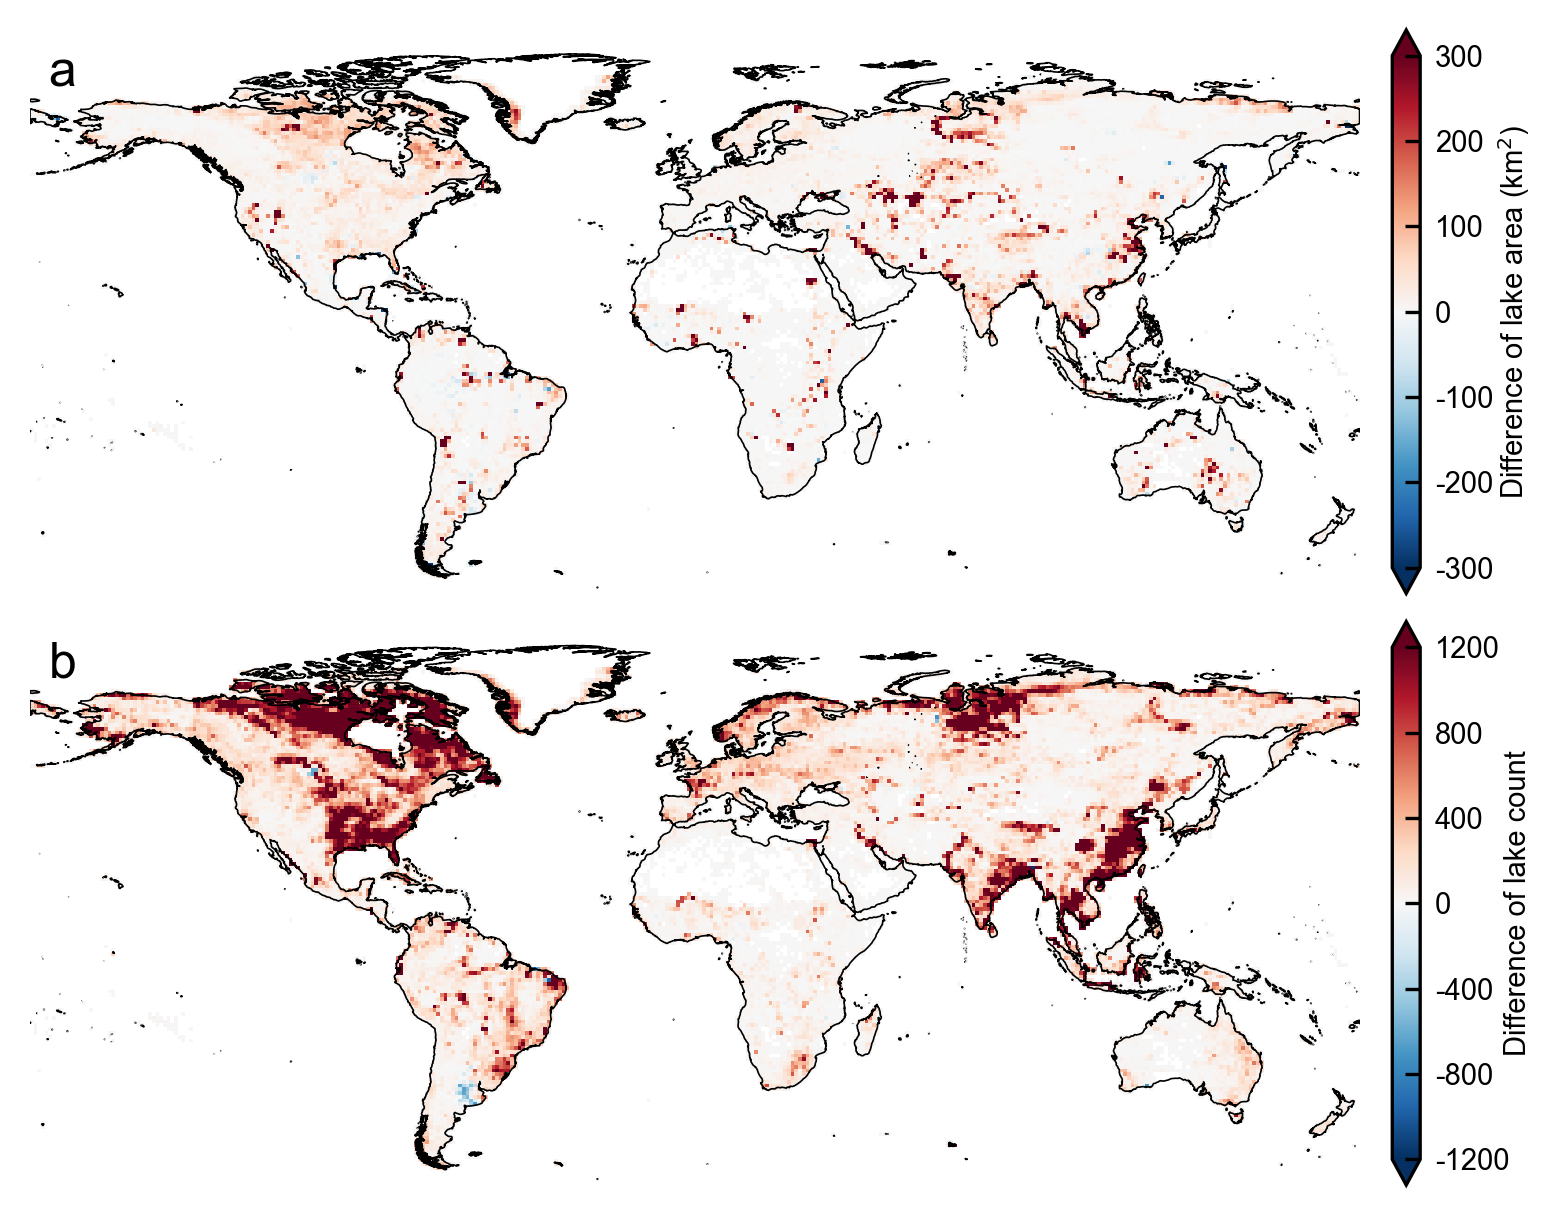

In [18]:
savepic=os.path.join(fig_path,'3-2 compare with PLD global grid.png')
fig=plt.figure(figsize=(6.12,5),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,2,width_ratios=[6,0.12],height_ratios=[1,1],wspace =0.0,hspace =0.05)

columns=['diff_a0','diff_c0']
grid_labels=[[0,0,1,0],[0,0,0,1]]
titles=['Difference of lake area (km$^2$)','Difference of lake count']

RdYlBu_r = plt.colormaps.get_cmap('RdBu_r')#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
terrain_map = ListedColormap(newcolors)
    
b1=300
b2=1200
norms=[colors.Normalize(vmin=-b1, vmax=b1),colors.Normalize(vmin=-b2, vmax=b2)]
ticks=[np.arange(-b1,b1+1,100),np.arange(-b2,b2+1,400)]

## 面积、数量纬度分布图
### a.格网面积
ax22 = plt.subplot(gs[0, 1])
ax2=plt.subplot(gs[0, 0])
ax2.text(-175,75,sub_fig_name[0],fontsize=12)
for spine in ax2.spines.values():
        spine.set_visible(False)
legend_kwds={'orientation': "vertical",'extend':'both','ticks': ticks[0]}
add_background_fig(ax2,ax22,latlon_1degree_SJ_last_data,terrain_map,columns[0],legend_kwds,norms[0])
ax22.text(5,0, titles[0],rotation=90,ha='right',va='center')

### b.格网数量
ax44 = plt.subplot(gs[1, 1])
ax4=plt.subplot(gs[1, 0])
ax4.text(-175,75,sub_fig_name[1],fontsize=12)
for spine in ax4.spines.values():
        spine.set_visible(False)
legend_kwds={'orientation': "vertical",'extend':'both','ticks': ticks[1]}
add_background_fig(ax4,ax44,latlon_1degree_SJ_last_data,terrain_map,columns[1],legend_kwds,norms[1])
ax44.text(5,0, titles[1],rotation=90,ha='right',va='center')

# ax4.legend(loc=[1.02,0.1],frameon=False)
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

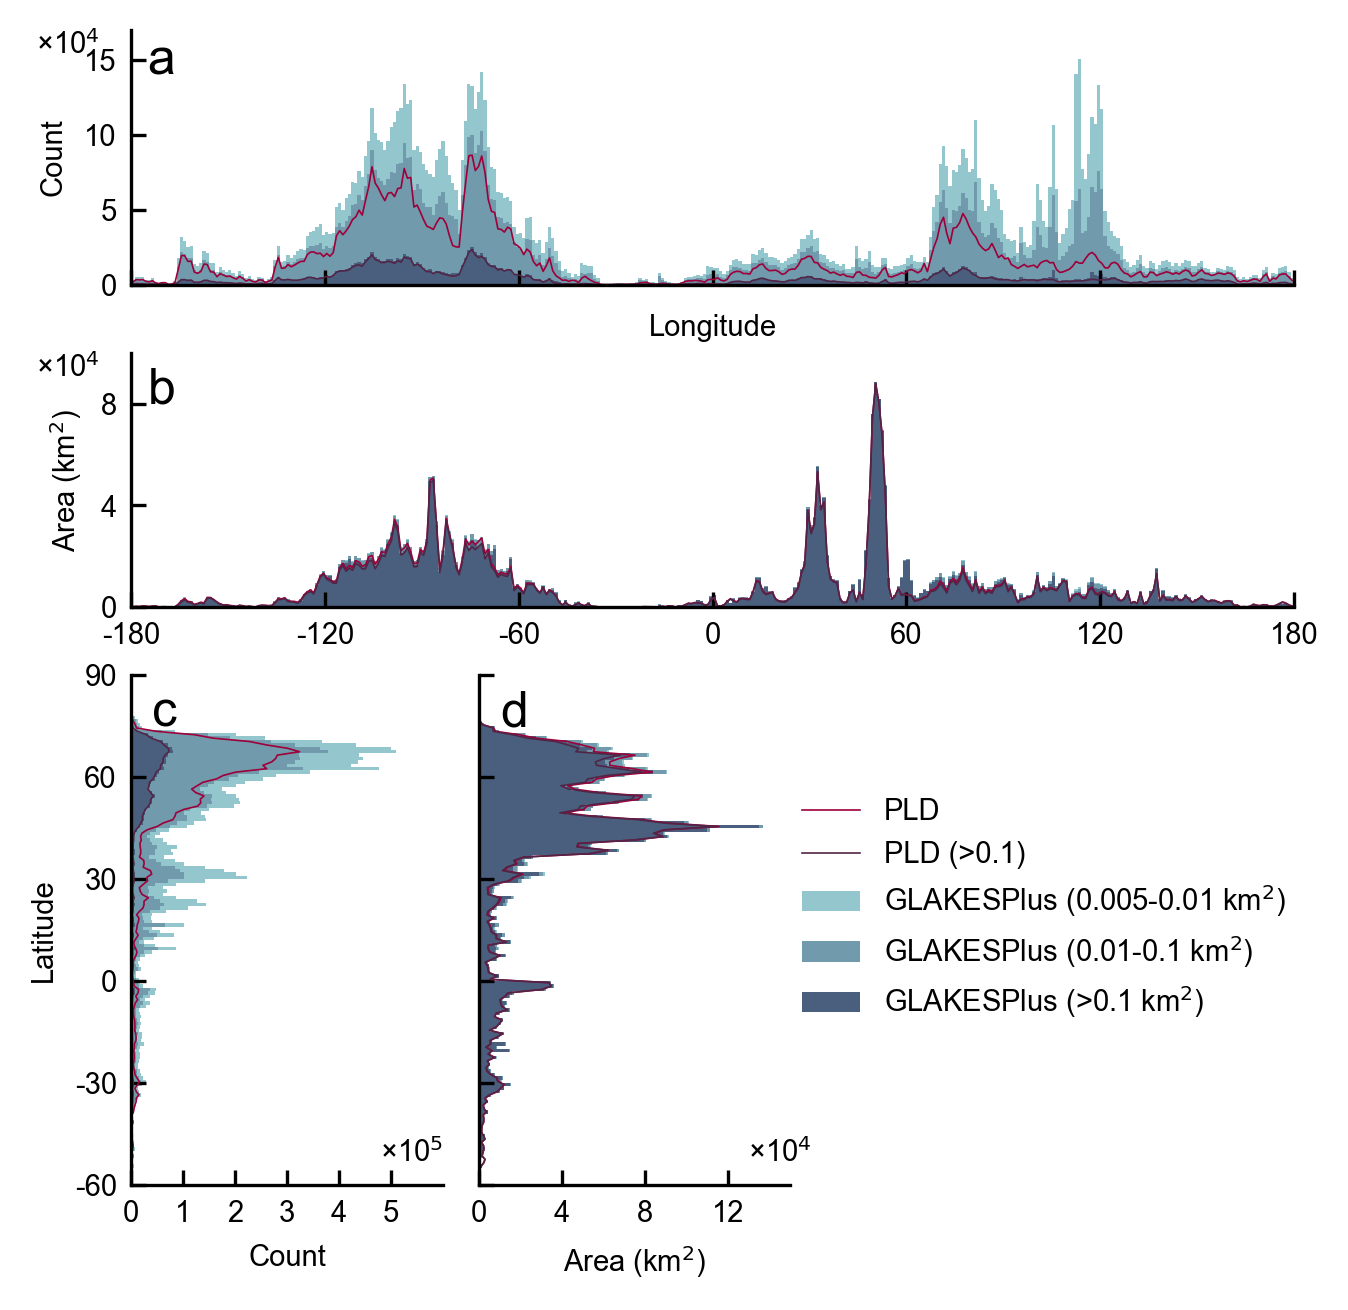

In [38]:
color=color_list[3:6]

savepic=os.path.join(fig_path,'3-2 compare with PLD Latitude longitude.png')
fig=plt.figure(figsize=(5,5),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(3,3,height_ratios=[1,1,2],width_ratios=[1,1,1.5],wspace =0.1,hspace =0.2)
## a.
ax1=plt.subplot(gs[0,:])
ax1.text(-175,14,sub_fig_name[0],fontsize=12)
s=4
y_top=Lon_data['hu_c0'].values/(10.0**s)
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
# draw_line(ax1,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-1],0.8,longitude,y_top)
y=Lon_data['hu_c1'].values/(10.0**s)#GL_c0
y_bottom=y_top-y
y=Lon_data['hu_c3'].values/(10.0**s)+Lon_data['hu_c10'].values/(10.0**s)#GL_c0
y_bottom_2=y_bottom-y
ax1.bar(longitude+0.5,y_top, color=color[0],width=1,label='GLAKESPlus (0.005-0.01 km$^2$)')
ax1.bar(longitude+0.5,y_bottom, color=color[1],width=1,label='GLAKESPlus (0.01-0.1 km$^2$)')
ax1.bar(longitude+0.5,y_bottom_2, color=color[2],width=1,label='GLAKESPlus (>0.1 km$^2$)')
y=P_Lon_data['pld_c0'].values/(10.0**s)
ax1.plot(longitude+0.5, y, color=color_list[-1], linestyle = "-",linewidth = 0.4,label='PLD')

y=y-(P_Lon_data['pld_c3'].values+P_Lon_data['pld_c10'].values)/(10.0**s)
ax1.plot(longitude+0.5, y, color=red_color_list[1], linestyle = "-",linewidth = 0.4,label='PLD (0.01-0.1)')
ax1.text(-190,17,f'×10$^{s}$',ha='right',va='top', color='k')
ax1.set_ylabel('Count', color='k')
ax1.set_xlim([-180,180])
ax1.set_xticks(range(-180,181,60))
ax1.set_ylim([0,17])
ax1.set_yticks([0,5,10,15])
ax1.spines[['top', 'right']].set_visible(False)
## b.
ax2=plt.subplot(gs[1,:])
ax2.text(-175,8,sub_fig_name[1],fontsize=12)
s=4
y_top=Lon_data['hu_a0'].values/(10.0**s)
# draw_line(ax1,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-1],0.8,longitude,y_top)
y=Lon_data['hu_a1'].values/(10.0**s)#GL_c0
y_bottom=y_top-y
y=(Lon_data['hu_a3'].values+Lon_data['hu_a10'].values)/(10.0**s)#GL_c0
y_bottom_2=y_bottom-y
ax2.bar(longitude+0.5,y_top, color=color[0],width=1,label='GLAKESPlus (0.005-0.01 km$^2$)')
ax2.bar(longitude+0.5,y_bottom, color=color[1],width=1,label='GLAKESPlus (0.01-0.1 km$^2$)')
ax2.bar(longitude+0.5,y_bottom_2, color=color[2],width=1,label='GLAKESPlus (>0.1 km$^2$)')
y=P_Lon_data['pld_a0'].values/(10.0**s)
ax2.plot(longitude+0.5, y, color=color_list[-1], linestyle = "-",linewidth = 0.4,label='PLD')

y=y-(P_Lon_data['pld_a3'].values+P_Lon_data['pld_a10'].values)/(10.0**s)
ax2.plot(longitude+0.5, y, color=red_color_list[1], linestyle = "-",linewidth = 0.4,label='PLD (0.01-0.1)')
# y=y-P_Lon_data['pld_a3'].values/(10.0**s)-P_Lon_data['pld_a10'].values/(10.0**s)
# ax2.plot(longitude+0.5, y, color=color_list[-1], linestyle = "-",linewidth = 0.4,label='PLD (0.01-0.1)')
# ax2.legend(loc=(0.65, 0.3),frameon=False)
ax2.text(-190,10,f'×10$^{s}$',ha='right',va='top', color='k')
ax2.set_xlabel('Longitude')
ax2.xaxis.set_label_position("top")
ax2.set_ylabel('Area (km$^2$)', color='k')
ax2.set_xlim([-180,180])
ax2.set_xticks(range(-180,181,60))
ax2.set_ylim([0,10])
ax2.set_yticks([0,4,8])
ax2.spines[['top', 'right']].set_visible(False)

## c.
ax1=plt.subplot(gs[2,0])
ax1.text(0.4,75,sub_fig_name[2],fontsize=12)
s=5
y_top=Lat_data['hu_c0'].values/(10.0**s)

# draw_line(ax1,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-1],0.8,longitude,y_top)
y=Lat_data['hu_c1'].values/(10.0**s)#GL_c0
y_bottom=y_top-y
y=Lat_data['hu_c3'].values/(10.0**s)+Lat_data['hu_c10'].values/(10.0**s)#GL_c0
y_bottom_2=y_bottom-y
ax1.barh(latitude+0.5,y_top, color=color[0],height=1,label='GLAKESPlus (0.005-0.01 km$^2$)')
ax1.barh(latitude+0.5,y_bottom, color=color[1],height=1,label='GLAKESPlus (0.01-0.1 km$^2$)')
ax1.barh(latitude+0.5,y_bottom_2, color=color[2],height=1,label='GLAKESPlus (>0.1 km$^2$)')
y=P_Lat_data['pld_c0'].values/(10.0**s)
ax1.plot(y,latitude+0.5, color=color_list[-1], linestyle = "-",linewidth = 0.4,label='PLD')

y=y-(P_Lat_data['pld_c3'].values+P_Lat_data['pld_c10'].values)/(10.0**s)
ax1.plot( y,latitude+0.5, color=red_color_list[1], linestyle = "-",linewidth = 0.4,label='PLD (0.01-0.1)')

ax1.text(6,-55,f'×10$^{s}$',ha='right',va='bottom', color='k')
ax1.set_ylabel('Latitude', color='k')
ax1.set_xlabel('Count')
ax1.set_xlim([0,6])
ax1.set_xticks(range(0,6))
ax1.set_ylim([-60,90])
ax1.set_yticks(range(-60,91,30))
ax1.spines[['top', 'right']].set_visible(False)

## d.
ax2=plt.subplot(gs[2,1])
ax2.text(1,75,sub_fig_name[3],fontsize=12)
plt.tick_params(labelbottom=True,labeltop=False,labelleft=False, labelright=False)
s=4
y_top=Lat_data['hu_a0'].values/(10.0**s)
# draw_line(ax1,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-1],0.8,longitude,y_top)
y=Lat_data['hu_a1'].values/(10.0**s)#GL_c0
y_bottom=y_top-y
y=Lat_data['hu_a3'].values/(10.0**s)+Lat_data['hu_a10'].values/(10.0**s)#GL_c0
y_bottom_2=y_bottom-y
ax2.barh(latitude+0.5,y_top, color=color[0],height=1,label='GLAKESPlus (0.005-0.01 km$^2$)')
ax2.barh(latitude+0.5,y_bottom, color=color[1],height=1,label='GLAKESPlus (0.01-0.1 km$^2$)')
ax2.barh(latitude+0.5,y_bottom_2, color=color[2],height=1,label='GLAKESPlus (>0.1 km$^2$)')
y=P_Lat_data['pld_a0'].values/(10.0**s)
ax2.plot(y,latitude+0.5, color=color_list[-1], linestyle = "-",linewidth = 0.4,label='PLD')
y=y-(P_Lat_data['pld_a3'].values+P_Lat_data['pld_a10'].values)/(10.0**s)
ax2.plot(y,latitude+0.5, color=red_color_list[1], linestyle = "-",linewidth = 0.4,label='PLD (>0.1)')
ax2.legend(loc=(1, 0.3),frameon=False)
ax2.text(16,-55,f'×10$^{s}$',ha='right',va='bottom', color='k')
ax2.set_xlabel('Area (km$^2$)')
ax2.set_xlim([0,15])
ax2.set_xticks(range(0,16,4))
ax2.set_ylim([-60,90])
ax2.set_yticks(range(-60,91,30))
ax2.spines[['top', 'right']].set_visible(False)
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()